IMPORTAMOS LOS PAQUETES

In [1]:
import pandas as pd
import numpy as np
import re

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
pd.set_option('display.max_rows', None)   # mostrar todas las filas del df


CARGAMOS LOS DATOS

In [2]:
df=pd.read_csv('../data/attacks.csv', encoding='latin1')


EXPLORACION DE DATOS

In [3]:
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.tail()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(25723, 24)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
#voy a cambiar el nombre de las columnas para que sea más maenjable y eliminar espacios

columnas = df.columns

columnas =[c.lower().replace(' ', '_') for c in df.columns]
columnas = [c[:-1] if c[-1] == '_' else c for c in columnas]
columnas[12] = 'fatal'
columnas

df.columns = columnas

df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [8]:
nan_cols=df.isna().sum()

print(len(nan_cols[nan_cols>0]))
nan_cols[nan_cols>0]

24


case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal                     19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

en todas las columnas hay una gran cantidad de NULOS

In [9]:
df[df.isna().any(axis=1)].tail()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# voy a ver los nulos en gráfico. copio la función que vimos en clase

def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();


'N nan cols: 24'

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex                       77.697003
age                       86.506240
injury                    75.609377
fatal                     77.595926
time                      88.539439
species                   86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

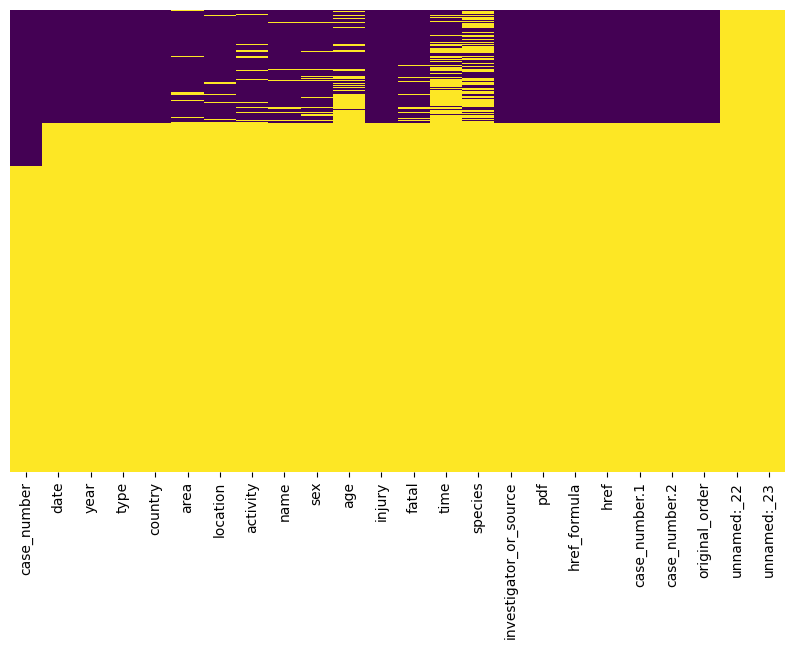

In [11]:
check_nan(df)

Todo lo amarillo son valores nulos, una gran cantidad del DataSet son nulos. Vamos a quitarlos.

In [12]:
columnas = list(df.columns)

In [13]:
columnas

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.1',
 'case_number.2',
 'original_order',
 'unnamed:_22',
 'unnamed:_23']

In [14]:
df.dropna(subset=columnas, inplace=True, how='all') # esto quita las filas con todo valores nulos

In [15]:
df.shape # hemos quitado unas 17000 filas

(8703, 24)

In [16]:
df.tail()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'N nan cols: 24'

case_number                0.011490
date                      27.588188
year                      27.611169
type                      27.634149
country                   28.162703
area                      32.816270
location                  33.792945
activity                  33.838906
name                      30.001149
sex                       34.080202
age                       60.117201
injury                    27.909916
fatal                     33.781455
time                      66.126623
species                   60.197633
investigator_or_source    27.783523
pdf                       27.588188
href_formula              27.599678
href                      27.588188
case_number.1             27.588188
case_number.2             27.588188
original_order            27.507756
unnamed:_22               99.988510
unnamed:_23               99.977019
dtype: float64

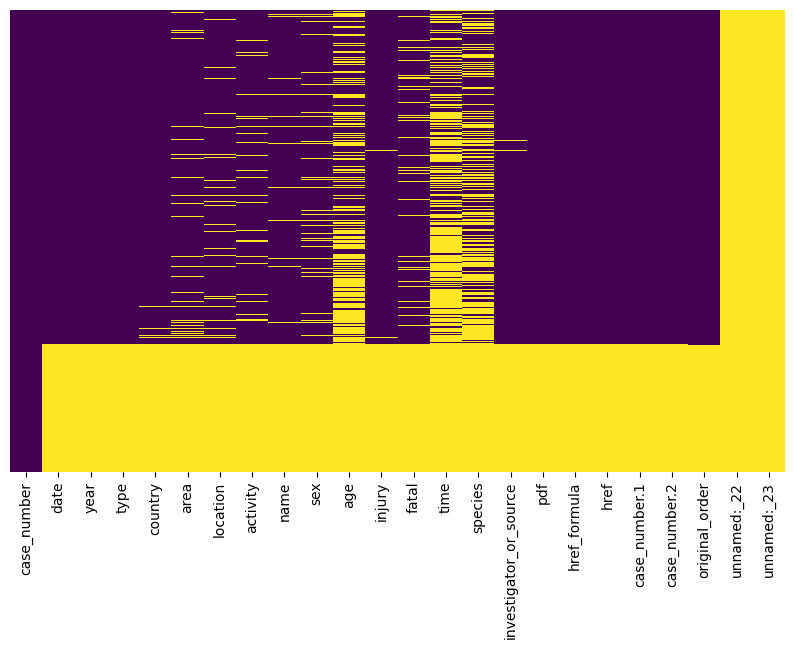

In [17]:
check_nan(df)

vemos que aún quedan muchas filas con tods los valores nulos excpeto en la primera columna

Voy a comprobar que valores hay en esa columna.

In [18]:
df[(df['date'].isnull())] # filtro donde date es nulo

df[(df['date'].isnull())]['case_number'].value_counts() # y miro los valores que hay en la primera columna en ese filtro

0     2400
xx       1
Name: case_number, dtype: int64

Como en esas filas solo hay 0 y xx, voy a borrar todas esas filas, quitando del subset la primera columna

In [19]:
columnas2 = columnas[1:]
columnas2

['date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.1',
 'case_number.2',
 'original_order',
 'unnamed:_22',
 'unnamed:_23']

In [20]:
df.dropna(subset=columnas2, inplace=True, how='all')

hemos quitado unas 2400 filas

In [21]:
df.shape

(6309, 24)

In [22]:
df.tail()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN


In [23]:
df[(df['date'].isnull())]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN


veo que aún quedan siete filas con el mismo problema ya que hay valores en la columna orginal order, pero el resto de columnas nulas. Las eliminaré quitando esa columna del subset que uso en el drop.

In [24]:
columnas2.remove('original_order')


In [25]:
df.dropna(subset=columnas2, inplace=True, how='all')

In [26]:
df.tail()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


'N nan cols: 18'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex                        8.965408
age                       44.922247
injury                     0.444303
fatal                      8.552840
time                      53.221200
species                   45.033323
investigator_or_source     0.269756
href_formula               0.015868
unnamed:_22               99.984132
unnamed:_23               99.968264
dtype: float64

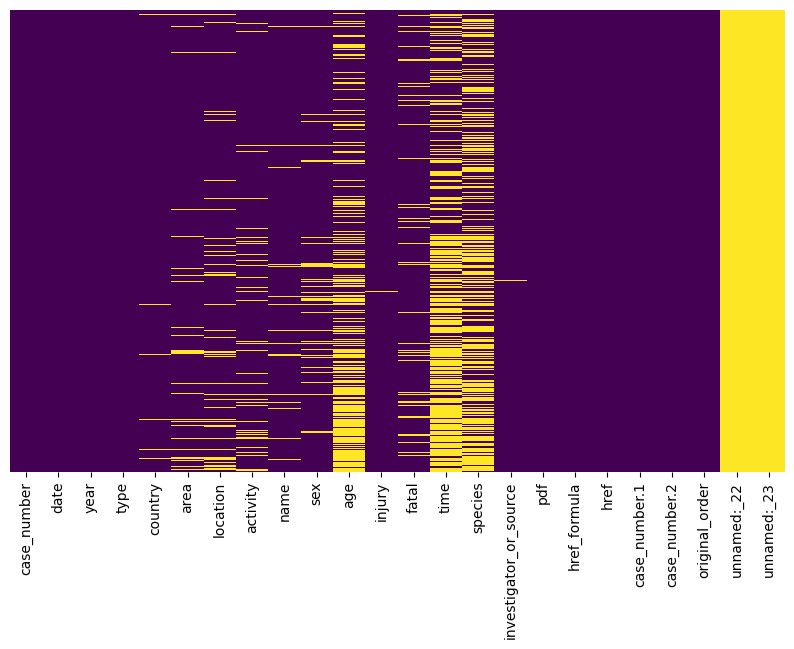

In [27]:
check_nan(df)

observamos que hay columnas que que ya no tienen nulos, y hemos quitado todos esas filas sin info. También se veque las dosúltmas columnas no tienen infromación. Las voy a elminar


In [28]:
df['unnamed:_22'].value_counts()

stopped here    1
Name: unnamed:_22, dtype: int64

In [29]:
df['unnamed:_23'].value_counts()

Teramo             1
change filename    1
Name: unnamed:_23, dtype: int64

In [30]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [31]:
df.drop(columns=columnas[-2:], inplace=True)

In [32]:
df.shape

(6302, 22)

'N nan cols: 16'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex                        8.965408
age                       44.922247
injury                     0.444303
fatal                      8.552840
time                      53.221200
species                   45.033323
investigator_or_source     0.269756
href_formula               0.015868
dtype: float64

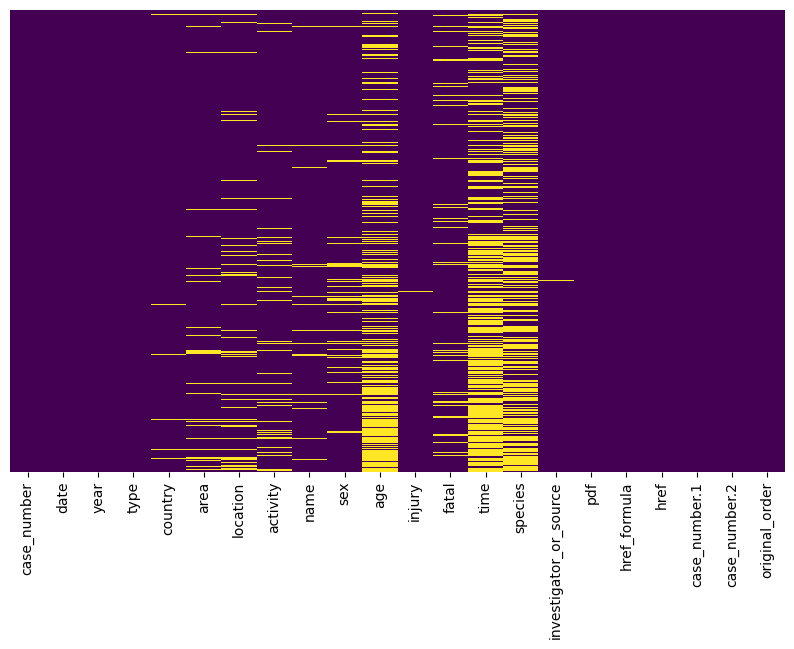

In [33]:
check_nan(df)

Comprobamos que haya duplicados

In [34]:
df.drop_duplicates().shape==df.shape 

True

Observamos que 16 filas todavía tienen nulos, y tres de ellas con una gran proporcion de nulos, superando el 40%. Pero como no superan el 80% no eliminaremos ninguna.

In [35]:
nan_cols=df.isna().sum()/len(df)*100

print(len(nan_cols[nan_cols>0]))
nan_cols[nan_cols>40]

16


age        44.922247
time       53.221200
species    45.033323
dtype: float64

Observamos estas columnas para ver como gestionar lo nulos.

In [36]:
df['age'].value_counts()[:10]

17    154
18    150
19    142
20    141
15    139
16    138
21    119
22    117
25    108
24    106
Name: age, dtype: int64

vemos que hay muchos tipos de valores, voy a intentar convertir los maximo posbles a números.

primero cambio el valor nulo a -99, para no tener nulos.

In [37]:
df['age'].fillna('unknown', inplace=True)

In [38]:
df['age'].value_counts()[:10]

unknown    2831
17          154
18          150
19          142
20          141
15          139
16          138
21          119
22          117
25          108
Name: age, dtype: int64

In [39]:
#voy a cambiar usando replace muchos casos muy concretos que no he podido generalizar 

df.age = df.age.str.replace('Teen', '16') # cambio el valor teen por 16 años
df.age = df.age.str.replace('teen', '16')
                                            # quito caracteres incomodos para mi
df.age = df.age.str.replace('(', '') 
df.age = df.age.str.replace(')', '')
df.age = df.age.str.replace('"', '')
df.age = df.age.str.replace("'", '')
df.age = df.age.str.replace('?', '')
df.age = df.age.str.replace('½', '')

df.age = df.age.str.replace('0s', '5') # los que termina en 0s son decadas, les pongo el valor mediana de la decada 20s = 25

'''# más casos concretos en el que les he asignado un valor en función de la descrpición, 
no son muchos casos por lo el error que pueda cometer no influye mucho'''

df.age = df.age.str.replace('Elderly', '75') 
df.age = df.age.str.replace('young', '25')
df.age = df.age.str.replace('middle-age', '45')
df.age = df.age.str.replace('adult', '45')
df.age = df.age.str.replace('adult', '45')
df.age = df.age.str.replace('Both 11', '11')
df.age = df.age.str.replace('mid-', '')
df.age = df.age.str.replace('Ca. 33', '33')
df.age = df.age.str.replace('16s', '16')
df.age = df.age.str.replace('>50', '55')


In [40]:
df['age'].value_counts()[:10]

unknown    2831
17          154
16          153
18          150
19          142
20          142
15          139
21          119
25          119
22          117
Name: age, dtype: int64

In [41]:
'''
hay otros casos en los que nos dan varios valores de edad como opción o en los que hay ataques con varias personas implicadas 
(&, or, to..)

estos casos los he solucionado quedandome con el último valor de la lista, el número de estos casos no era muy alto, 
y no implica una gran proporción del total de la muestra.
Pero si perdemos la información de los casos múltiples. En principio para nosotros no es relevante, 
ya que el resto de la información está referida a una persona.

También en la siguiente función trato algunos casos en los aparece la cadena month, viendo estos casos iba de 3 a 18 meses, les
he asigando a todos el valor 1.

Además he truncado los posbiles espacios en blanco que queden.

'''


def limpiar_age(x):
    
    if 'month' in x:
        return '1'
    elif '&' in x:
        indice = x.index('&')
        return x[indice+1:].strip()
    elif 'r ' in x:
        indice = x.index('r')
        return x[indice+1:].strip()
    elif 'to' in x:
        indice = x.index('o')
        return x[indice+1:].strip()

    else:
        return x.strip()
 

In [42]:
df['age'] = df.age.apply(limpiar_age)

In [43]:
df['age'].value_counts()[:10]

unknown    2831
16          154
17          154
18          152
20          145
19          144
15          139
21          119
25          119
22          118
Name: age, dtype: int64

In [44]:
'''
por último convierto todo lo que no puedo interpretar y los nulos como -99, e interpretar este valor como nulo y poder pasar
esta columna a numérica.

Los nulos los dejo como nulos y no les doy ningún valor porque me parece demasiado interpretar tantos valores (>40%)
'''


def quitar_strings(x):
    
    try:
        int(float(x))
        return x
    except:
        return '-99'
    

x ='dgd'
    
quitar_strings(x)

'-99'

In [45]:
df['age'] = df.age.apply(quitar_strings)

In [46]:
df['age'].value_counts()[:10]

-99    2840
16      154
17      154
18      152
20      145
19      144
15      139
21      119
25      119
22      118
Name: age, dtype: int64

In [47]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     6302 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null   

In [48]:
# transformo la columna a tipo entero, teniendo en cuenta que el valor -99 es unknown

df['age']=df['age'].astype('int')

In [49]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     6302 non-null   int32  
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null   

'N nan cols: 15'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex                        8.965408
injury                     0.444303
fatal                      8.552840
time                      53.221200
species                   45.033323
investigator_or_source     0.269756
href_formula               0.015868
dtype: float64

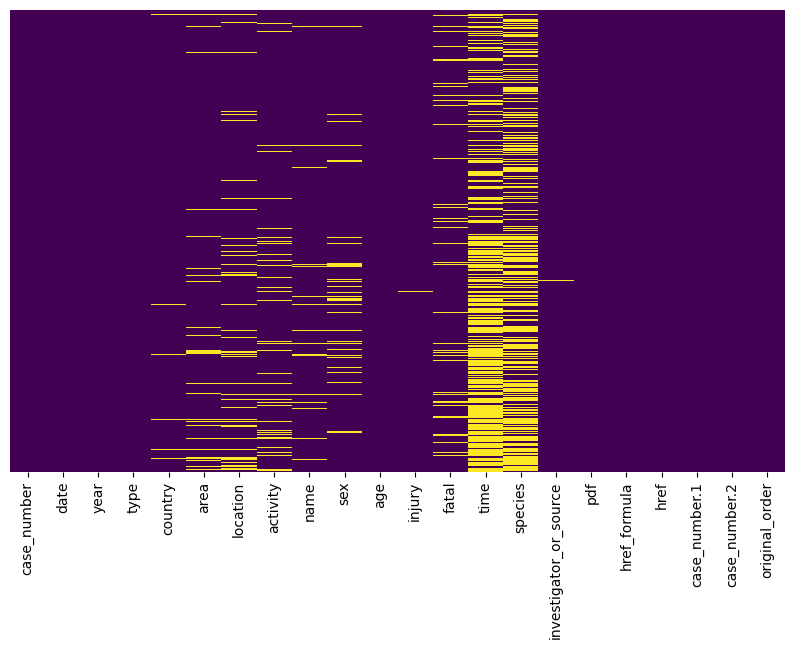

In [50]:
check_nan(df)

In [51]:
df['species'].value_counts()[:10]

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
6' shark                                               40
4' shark                                               40
1.8 m [6'] shark                                       35
Name: species, dtype: int64

In [52]:
# primero paso los nulos a 'unknown'

df['species'].fillna('unknown', inplace=True)

In [53]:
'''
con la lista anterior he revisado que tipos de valores había en la columna
había muchas especies de tiburones, otros sin especificar la especie, ataques no confirmados... 
además de que cada registro tenía unas medidas de longitud del tiburón

He decidido separar por un lado los registros que no confirman ataque de tiburón
por otro lado las especies dudosas, no identificadas y las que no se especifica la especie como especie no identificada

Y he revisado la mayoría de las especies de tiburón presentes y he agrupado los registros por especie 

todo eso en la siguiente función.
'''

def limpiar_species(x):
    x = x.lower()
    if 'invalid' in x:
        return 'invalid'
    elif 'not confirmed' in x:
        return 'shark attack not confirmed'
    elif 'unconfirmed' in x:
        return 'shark attack not confirmed'
    elif 'questionable' in x:
        return 'shark attack not confirmed'
    elif 'questionable' in x:
        return 'shark attack not confirmed'
    elif 'no shark' in x:
        return 'shark attack not confirmed'
    elif '?' in x:
        return 'unidentified shark specie'
    elif 'possibly' in x:
        return 'unidentified shark specie'
    elif 'or' in x:
        return 'unidentified shark specie'
    elif 'unidentified' in x:
        return 'unidentified shark specie'
    elif 'blue whaler' in x:
        return 'blue whaler'
    elif 'white' in x:
        return 'white shark'
    elif 'tiger' in x:
        return 'tiger shark'
    elif 'bull' in x:
        return 'bull shark'
    elif 'mako' in x:
        return 'mako shark'
    elif 'silky' in x:
        return 'silky shark'
    elif 'galapagos' in x:
        return 'galapagos shark'
    elif 'bronze whaler' in x:
        return 'bronze whaler shark'
    elif 'blue' in x:
        return 'blue shark'
    elif 'wobbegong' in x:
        return 'wobbegong shark'
    elif 'zambesi' in x:
        return 'zambesi shark'
    elif 'nurse' in x:
        return 'nurse shark'
    elif 'raggedtooth' in x:
        return 'raggedtooth shark'
    elif 'hammerhead' in x:
        return 'hammerhead shark'
    elif 'whaler' in x:
        return 'whaler shark'
    elif 'small' in x:
        return 'small shark'
    elif 'spinner' in x:
        return 'spinner shark'
    elif 'lemon' in x:
        return 'lemon shark'
    elif 'basking' in x:
        return 'basking shark'
    elif 'sand' in x:
        return 'sand shark'
    elif 'blacktip' in x:
        return 'blacktip shark'
    elif 'dusky' in x:
        return 'dusky shark'
    elif 'dog' in x:
        return 'dog shark'
    elif 'grey reef' in x:
        return 'grey reef shark'
    elif 'angel' in x:
        return 'angel shark'
    elif 'sevengill' in x:
        return 'sevengill shark'
    elif 'caribbean reef' in x:
        return 'caribbean reef shark'
    elif 'gill' in x:
        return 'gill shark'
    elif 'busk' in x:
        return 'busk shark'
    elif 'shark' in x:
        return 'unidentified shark specie'
    else:
        return 'unknown'  # el resto son 16 registros variados y 8 que son strings vacías, los meto unknown con los nulos

In [54]:
df['species'] = df.species.apply(limpiar_species)

In [55]:
df['species'].value_counts()


unknown                       2861
unidentified shark specie     1206
white shark                    626
shark attack not confirmed     404
tiger shark                    256
bull shark                     157
invalid                        103
nurse shark                     90
small shark                     65
blacktip shark                  60
bronze whaler shark             56
blue shark                      49
mako shark                      46
wobbegong shark                 46
raggedtooth shark               43
hammerhead shark                41
lemon shark                     31
zambesi shark                   27
sand shark                      19
grey reef shark                 17
caribbean reef shark            15
spinner shark                   15
sevengill shark                 12
dusky shark                     11
dog shark                        9
basking shark                    7
whaler shark                     7
galapagos shark                  6
angel shark         

In [56]:
'''
con lo que hemos visto en la columna de especie sospecho que hay muchos registros que no son verdaderamente ataques de tiburón
shark attack not confirmed y invalid

LA columna type también tiene valores invalidos, vamos a observar esta columna

'''


#voy a observar la columna type

'\ncon lo que hemos visto en la columna de especie sospecho que hay muchos registros que no son verdaderamente ataques de tiburón\nshark attack not confirmed y invalid\n\nLA columna type también tiene valores invalidos, vamos a observar esta columna\n\n'

In [57]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [58]:
df['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [59]:
# boating, Boatomg y boat es lo mismo lo unifico 


df.type = df.type.str.replace('Boating', 'Boat') 
df.type = df.type.str.replace('Boatomg', 'Boat') 

In [60]:
df['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
Questionable       2
Name: type, dtype: int64

In [61]:
df[df['type'].isna()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,-99,Injuries to hands and legs,N,Night,unknown,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,unknown,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,-99,FATAL,Y,NaN,unknown,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,-99,FATAL,Y,NaN,unknown,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


In [62]:
# solo hay cuatro nulos los meto con la mayoría

df['type'].fillna('Unprovoked', inplace=True)

In [63]:
df[df['type'] == 'Questionable']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,-99,"No injury, surfboard damaged",N,10h30,shark attack not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0
20,2018.04.25.b,25-Apr-2018,2018.0,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,-99,No injury,N,07h00,shark attack not confirmed,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,6283.0


In [64]:
df[df['type'] == 'Invalid'].head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,invalid,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0
31,2018.04.10.R,Reported 10-Apr-2018,2018.0,Invalid,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,M,56,Injury to ankle from marine animal trapped in ...,N,NaN,shark attack not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0
43,2018.02.14,14-Feb-2018,2018.0,Invalid,AUSTRALIA,Queensland,Mooloolaba Beach,Swimming,Sharna Babd,F,-99,"Collision / No injury, no attack",N,18h00,unidentified shark specie,"Sunshine Coast Daily, 2/15/2018",2018.02.14-Babd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.14,2018.02.14,6260.0
44,2018.02.11,11-Feb-2018,2018.0,Invalid,BRAZIL,"Boi Island, Victoria",Espirito Santo,Cleaning fish,Rosalida Souza,F,46,Lacerations to 4 toes of right foot,N,NaN,unidentified shark specie,TrackingSharks.com,2018.02.11-Rosilda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.11,2018.02.11,6259.0


In [65]:
'''
dentro de Invalid hya un poco de todo, casos donde no ha habido daños, ataques dudosos...
podemos meter los dos questionables en invalids

'''

df.type = df.type.str.replace('Questionable', 'Invalid') 

In [66]:
# ahora vamos a ver la realcion de dos categorias de specie con los invalid

In [67]:
#df_no_sp = df[(df['species'] == 'shark attack not confirmed') | (df['species'] == 'invalid')][['species','type']]

df[(df['species'] == 'shark attack not confirmed')]['type'].value_counts()

Invalid         391
Unprovoked        7
Sea Disaster      4
Provoked          1
Boat              1
Name: type, dtype: int64

In [68]:
df[(df['species'] == 'invalid')]['type'].value_counts()

Invalid    103
Name: type, dtype: int64

In [69]:
df[(df['type'] == 'Invalid')]['species'].value_counts()

shark attack not confirmed    391
invalid                       103
unknown                        24
unidentified shark specie      23
white shark                     3
tiger shark                     2
small shark                     1
bull shark                      1
dusky shark                     1
Name: species, dtype: int64

In [70]:
'''
dentro de la columna species vemos que la categoría 'shark attack not confirmed' e 'invalid', coinciden casi todos con la
el type 'Invaled', por lo que al tener esa inforamción en la columna type vamos, a quitar esos dos valores de especies y 
los meto en unknwon
'''

"\ndentro de la columna species vemos que la categoría 'shark attack not confirmed' e 'invalid', coinciden casi todos con la\nel type 'Invaled', por lo que al tener esa inforamción en la columna type vamos, a quitar esos dos valores de especies y \nlos meto en unknwon\n"

In [71]:
df.species = df.species.str.replace('shark attack not confirmed', 'unknown')
df.species = df.species.str.replace('invalid', 'unknown')

In [72]:
df['species'].value_counts().head(7)

unknown                      3368
unidentified shark specie    1206
white shark                   626
tiger shark                   256
bull shark                    157
nurse shark                    90
small shark                    65
Name: species, dtype: int64

In [73]:
# vamos a analizar la columna año que tenía un bajo porcentaje de nulos

# como es númerica voy a usar describe() para tener una idea general de la info

df.describe().T

# vemos que solo hay dos nulos, pero hay fechas erroneas ya que el minimo es 0


,count,mean,std,min,25%,50%,75%,max
year,6300.0,1927.272381,281.116308,0.0,1942.00,1977.0,2005.00,2018.0
age,6302.0,-29.600127,63.702959,-99.0,-99.00,13.0,25.00,87.0
original_order,6302.0,3152.499683,1819.375481,2.0,1577.25,3152.5,4727.75,6303.0


In [74]:
df[df['year'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,-99,FATAL,Y,NaN,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [75]:
# modifico esos valores nulos

df.loc[[187, 6079], 'year'] = [2017, 1836]
df.iloc[[187, 6079]]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
187,2017.01.08.R,Reported 08-Jan-2017,2017.0,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,1836.0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,-99,FATAL,Y,NaN,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [76]:
# ahora voy a explorar el reto de fechas



In [77]:
df['year'].value_counts().head()

2015.0    143
2017.0    137
2016.0    130
2011.0    128
2014.0    127
Name: year, dtype: int64

In [78]:
df[df['year']< 1500]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,-99,Foot severed,N,NaN,unknown,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0
6175,0077.00.00,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,-99,FATAL,Y,NaN,unknown,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0
6176,0005.00.00,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,-99,Aboriginal rock carving depicts man being atta...,N,NaN,unknown,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,-99,"FATAL, shark/s bit him in two",Y,NaN,unknown,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,-99,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,unknown,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,-99,Herodotus tells of sharks attacking men in the...,Y,NaN,unknown,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,-99,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,unknown,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,-99,Arm bitten,N,NaN,unknown,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0
6182,ND-0153,1990 or 1991,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,-99,Conway's leg was bitten Higgs injury was FATAL,N,NaN,unknown,A.J. Venter,ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0153,ND-0153,121.0
6183,ND-0152,Before 2016,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,-99,FATAL,Y,NaN,unknown,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0152,ND-0152,120.0


In [79]:
#he visto datos que son antes del año 1000, no nos interesan estos datos tan antiguos

#los elimino por sus indices

keyword='A.D'
indice_borrar=df[df.date.str.contains(keyword, regex=True)].index

indice_borrar

Int64Index([6174, 6175, 6176], dtype='int64')

In [80]:
keyword='B.C'

indice_borrar = indice_borrar.append(df[df.date.str.contains(keyword, regex=True)].index)

In [81]:
df.shape

(6302, 22)

In [82]:
indice_borrar

Int64Index([6174, 6175, 6176, 6177, 6178, 6179, 6180], dtype='int64')

In [83]:
df.drop(index=indice_borrar, inplace=True)

df.shape

(6295, 22)

In [84]:
df[df['year'] == 0]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,-99,Arm bitten,N,NaN,unknown,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0
6182,ND-0153,1990 or 1991,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,-99,Conway's leg was bitten Higgs injury was FATAL,N,NaN,unknown,A.J. Venter,ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0153,ND-0153,121.0
6183,ND-0152,Before 2016,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,-99,FATAL,Y,NaN,unknown,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0152,ND-0152,120.0
6184,ND-0151,Before Oct-2009,0.0,Unprovoked,PANAMA,Bocas del Toro Province,Red Frog Beach,Swimming/,male,M,20,FATAL,Y,NaN,unknown,C. Mendieta & A. Duarte,ND-0151-Panama.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0151,ND-0151,119.0
6185,ND-0150,Before 1934,0.0,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,-99,Foot bitten,N,NaN,unknown,"Di Candia, 2004",ND-0150-Uruguay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0150,ND-0150,118.0
6186,ND-0149,Before 1934,0.0,Unprovoked,URUGUAY,Rocha,"Playa del Barco, La Pedrera",Swimming,Maciello,M,-99,FATAL,Y,NaN,unknown,"Di Candia, 2004",ND-0149-Maciello.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0149,ND-0149,117.0
6187,ND-0148,2009?,0.0,Unprovoked,USA,South Carolina,Charleston,Swimming,Rick Donnis,M,-99,Minor injury,N,NaN,unknown,WBTV-News3,ND-0148-Donnis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0148,ND-0148,116.0
6188,ND-1940,Before 1930,0.0,Unprovoked,PAPUA NEW GUINEA,Morobe Province,Simbang,Swimming to canoe,male,M,-99,FATAL,Y,NaN,unknown,"The Advertiser (Adelaide), 6/2/1933",ND-0140-NewGuinea.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-1940,ND-1940,115.0
6189,ND-0139,1880-1899,0.0,Unprovoked,AUSTRALIA,Queensland,Boonooroo,NaN,Lassie,F,15,Foot severed,N,NaN,unknown,"Courier Mail, 6/30/1951",ND-0139-Lassie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0139,ND-0139,114.0
6190,ND-0138,Before 1909,0.0,Unprovoked,AUSTRALIA,Queensland,Moreton Bay,Fell into the water,Lieutenant Hexton,M,-99,FATAL,Y,NaN,unknown,"Brisbane Courier, 1/28/1909",ND-0138-Hexton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0138,ND-0138,113.0


In [85]:
# en la columna fecha tengo info que me podría dar el año

df[df['year']< 1500]['date'].value_counts().head()

No date                 6
No date, Before 1963    5
Before 1906             4
Before 1958             4
Before 1911             3
Name: date, dtype: int64

In [86]:
'''
voy a cambiar donde no tenemos años en función de la info de fechas
he visto que había muchos "before 19.." esos casos se va quedar con la fechas
ye en los que aaparecen dos fechas hagp la  media

en definitiva voy a coger donde haya un número de cautro digitos y asignarle ese valor, y si hay varios hago la media
'''


def buscar_año(x):
    l = re.findall(r'\d{4}', x)
    l = [int(i) for i in l]
    return np.mean(l).round()


df2 =df.copy()

df.species.apply(limpiar_species)

df.loc[df['year'] == 0, 'year'] = df['date'].apply(buscar_año)

In [87]:
df.tail()


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
6297,ND.0005,Before 1903,1903.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,-99,FATAL,Y,NaN,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,1903.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,-99,FATAL,Y,NaN,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,1902.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,-99,FATAL,Y,NaN,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,1886.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,-99,FATAL,Y,NaN,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND.0001,1845-1853,1849.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,unknown,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6286.0,1966.786351,48.414726,1543.0,1944.0,1978.0,2005.0,2018.0
age,6295.0,-29.522955,63.696293,-99.0,-99.0,13.0,25.0,87.0
original_order,6295.0,3155.865131,1817.583584,2.0,1582.5,3156.0,4729.5,6303.0


In [89]:
# se han generado 9 valores nulos

df[df['year'].isna()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
6217,ND.0097,No date,NaN,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,-99,Hand bitten,N,NaN,unknown,Internet,ND-0097-PaulMenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0
6218,ND.0096,No date,NaN,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,NaN,M,-99,Survived,N,NaN,unknown,G. Van Grevelynghe,ND-0096-Zodiac-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0096,ND.0096,85.0
6261,ND.0042,"""Before the war""",NaN,Unprovoked,AUSTRALIA,Torres Strait,Thursday Island?,Free diving,Mortakee,M,-99,Head bitten,N,NaN,unknown,Press clipping dated 6/28/1950,ND-0042-Mortakee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0042,ND.0042,42.0
6271,ND.0032,World War II,NaN,Sea Disaster,PAPUA NEW GUINEA,Between New Ireland & New Britain,St. Georges Channel,Spent 8 days in dinghy,pilot,M,-99,"No injury, but shark removed the heel & part o...",N,NaN,unknown,"G.A. Llano in Airmen Against the Sea, p.69; V....",ND-0032-RabaulPilot.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0032,ND.0032,32.0
6272,ND.0031,World War II,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",male,M,-99,Shark bumped him,N,NaN,unknown,"V.M. Coppleson (1962), p.257",ND-0031-Ditched-Aircrat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0031,ND.0031,31.0
6275,ND.0027,No date,NaN,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,Psarofa-gomenes,M,-99,Head bitten,N,NaN,unknown,M. N. Kalafatas,ND-0027-Psarofagomenos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0027,ND.0027,28.0
6279,ND.0023,No date,NaN,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,-99,Ankle bitten,N,NaN,unknown,"L. Green in Tavern of the Seas, p.182",ND-0023-Dalton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0023,ND.0023,24.0
6280,ND.0022,No date,NaN,Unprovoked,AUSTRALIA,NaN,NaN,Pearl diving,Jaringoorli,M,-99,Lacerations to thigh,N,NaN,unknown,"Adelaide Advertiser, 1/11/1940",ND-0022-Jaringoorli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0022,ND.0022,23.0
6281,ND.0021,No date,NaN,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming in pool formed by construction of a w...,Indian boy,M,-99,"FATAL, leg severed",Y,NaN,unknown,"L. Green in South African Beachcomber, p.97",ND-0021-DurbanIndianBoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0021,ND.0021,22.0


In [90]:
#los elimino, les falta bastane información y son pocos registros

df.dropna(subset=['year'], inplace=True)  # esto quita nulos por filas en esta columna

In [91]:
df.shape


(6286, 22)

In [92]:
df['year']=df['year'].astype('int')

'N nan cols: 0'

Series([], dtype: float64)

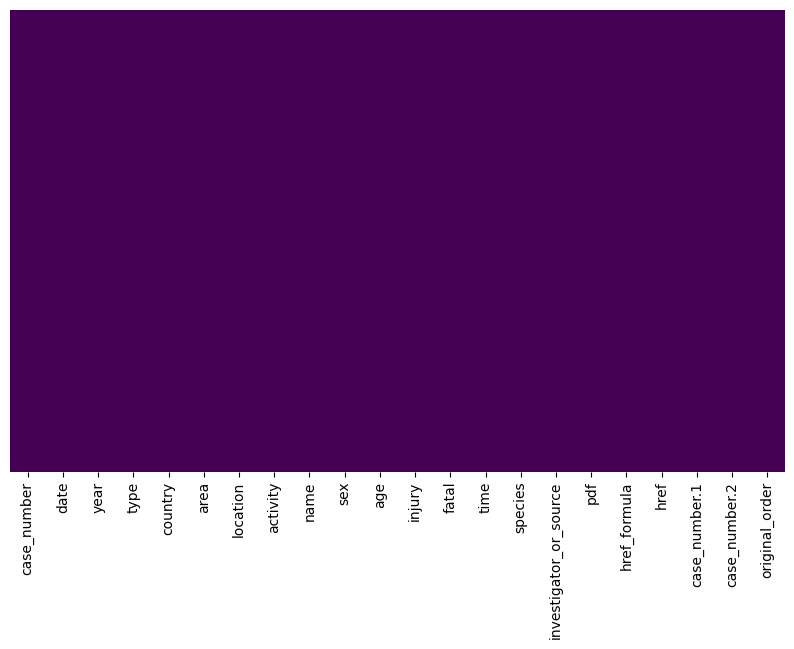

In [93]:
'''
ya que no hay mas columnas numericas con numeros transformo el resto de valores nulos a 'unknown' para poder trabajar mejor
y los gestionaré mas tarde
'''
df.fillna('unknown', inplace=True)

check_nan(df)

In [94]:
# voy a revisar la columna fatal

df['fatal'].value_counts()

N          4283
Y          1382
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal, dtype: int64

In [95]:
df['fatal'] =  df['fatal'].str.strip()

In [96]:
df['fatal'] =  df['fatal'].str.upper()

In [97]:
df['fatal'].value_counts()

N          4291
Y          1383
UNKNOWN     610
M             1
2017          1
Name: fatal, dtype: int64

In [98]:
df[~((df['fatal']== 'N') | (df['fatal']== 'Y'))].head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
27,2018.04.15.c,15-Apr-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",UNKNOWN,unknown,unknown,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0
76,2017.10.01,01-Oct-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,UNKNOWN,unknown,unknown,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0
79,2017.09.24.b,24-Sep-2017,2017,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",UNKNOWN,15h30,unknown,"S. Curatolo-Wageman, GSAF",2017.09.24.b-Behrend.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.24.b,2017.09.24.b,6224.0
84,2017.09.15.b,15-Sep-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",UNKNOWN,Afternoon,unknown,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,2017.09.15.b,6219.0
98,2017.08.26.b,26-Aug-2017,2017,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,UNKNOWN,Midday,unknown,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,2017.08.26.b,6205.0


In [99]:
# veo que algunos se puede deducir facilmente de la columna injury

indice_cambio = df[df.injury.str.contains('No injur')][df['fatal'] == 'UNKNOWN'].index

indice_cambio = list(indice_cambio)

df.loc[indice_cambio, 'fatal'] = 'N'

df['fatal'].value_counts()

N          4371
Y          1383
UNKNOWN     530
M             1
2017          1
Name: fatal, dtype: int64

In [100]:
indice_cambio = df[df.injury.str.contains('FATAL')][df['fatal'] == 'UNKNOWN'].index


indice_cambio = list(indice_cambio)

df.loc[indice_cambio, 'fatal'] = 'Y'

df['fatal'].value_counts()

N          4371
Y          1422
UNKNOWN     491
M             1
2017          1
Name: fatal, dtype: int64

In [101]:
# estos dos que queda fuera del rango Y,N, UNKNOWN los paso a N

df[~((df['fatal']== 'N') | (df['fatal']== 'Y') | (df['fatal']== 'UNKNOWN'))].head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
285,2016.04.18.b,18-Apr-2016,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,grey reef shark,"TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0
786,2012.06.10,10-Jun-2012,2012,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,blue shark,"D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0


In [102]:
indice_cambio = df[~((df['fatal']== 'N') | (df['fatal']== 'Y') | (df['fatal']== 'UNKNOWN'))].index


indice_cambio = list(indice_cambio)

df.loc[indice_cambio, 'fatal'] = 'N'

df['fatal'].value_counts()

N          4373
Y          1422
UNKNOWN     491
Name: fatal, dtype: int64

In [103]:
df.to_csv('../data/attacks_limpio.csv', index=False)